In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import gseapy as gp

In [48]:
gwas_IBD = pd.read_csv("./data/EFO_0003767_associations_export_IBD.tsv", sep="\t")
xenium_colon= pd.read_csv("./data/Xenium_hColon_v1_metadata.csv")
HPA_colon = pd.read_csv("./data/colon_high_expression_HPA.tsv", sep="\t")

In [83]:
gwas_IBD_genes = set(gwas_IBD["mappedGenes"].str.split(",").str[0])
xenium_colon_genes = set(xenium_colon["Gene"])
HPA_colon_genes = set(HPA_colon["Gene"])

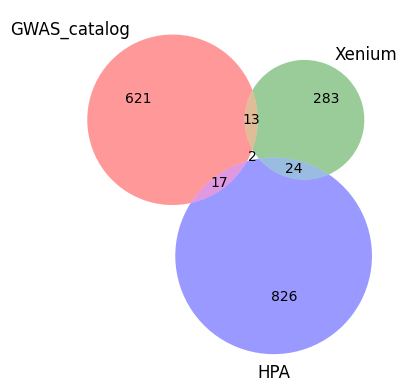

In [85]:
venn_diagram = venn3([gwas_IBD_genes, xenium_colon_genes, HPA_colon_genes], set_labels=('GWAS_catalog', 'Xenium', 'HPA'))
plt.show()

In [77]:
common_genes_gwas_xenium = gwas_IBD_genes.intersection(xenium_colon_genes)
common_genes_HPA_xenium = HPA_colon_genes.intersection(xenium_colon_genes)

In [28]:
common_genes_HPA_xenium

{'ANK2',
 'BCAS1',
 'CA2',
 'CD14',
 'CD177',
 'CEACAM1',
 'CEACAM5',
 'CES2',
 'CHGB',
 'CLCA1',
 'HHLA2',
 'ITLN1',
 'KRTCAP3',
 'LEPROTL1',
 'MS4A12',
 'MYH14',
 'NXPE4',
 'PLCE1',
 'PLXND1',
 'PPP1R1B',
 'PRPH',
 'SELENBP1',
 'SLC26A2',
 'TFF1',
 'UGT2A3',
 'UGT2B17'}

In [29]:
xenium_colon_genes = set(xenium_colon["Ensembl ID"])
HPA_colon_genes = set(HPA_colon["Ensembl"])

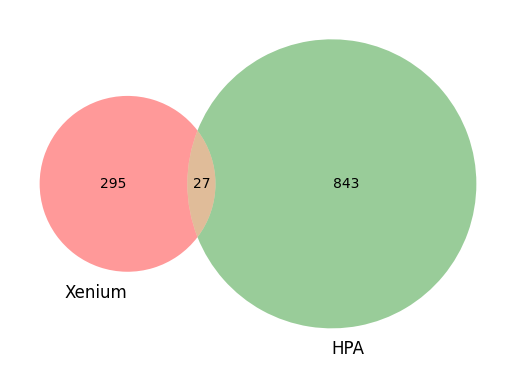

In [33]:
venn_diagram = venn2([xenium_colon_genes, HPA_colon_genes], set_labels=('Xenium', 'HPA'))
plt.show()

In [52]:
xenium_colon_genes = xenium_colon["Gene"]
enr = gp.enrichr(gene_list= xenium_colon_genes,
                 gene_sets=['Human_Gene_Atlas','Tabula_Sapiens', 'PanglaoDB_Augmented_2021', 
                            'CellMarker_Augmented_2021','ARCHS4_Tissues'],
                 organism='human',
                 outdir=None,
                )

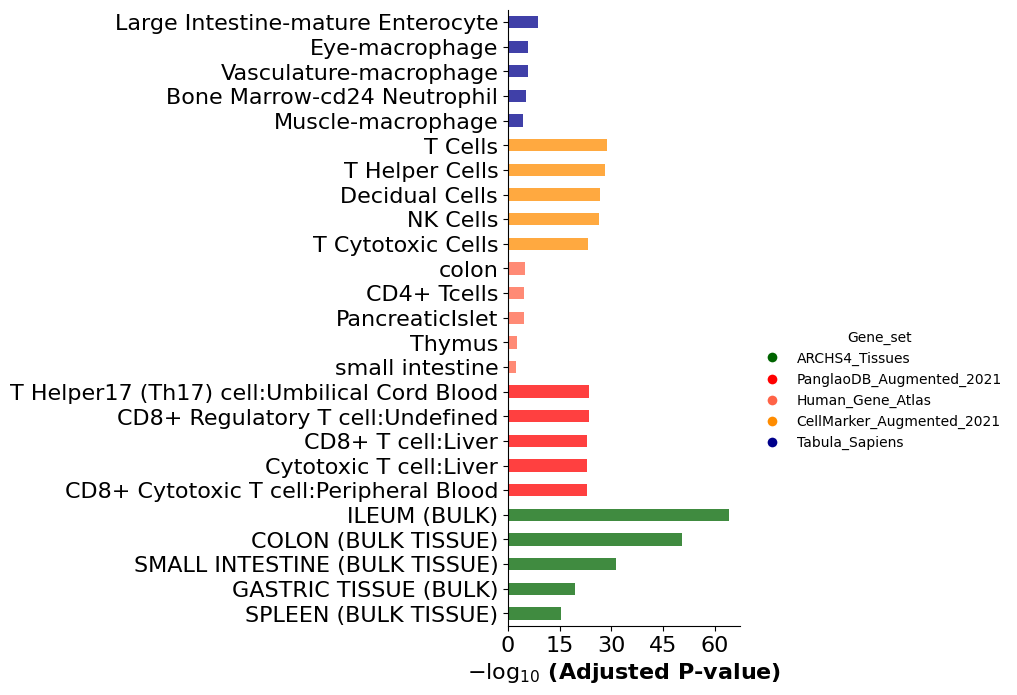

In [61]:
ax = gp.barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=10,
              top_term=5,
              figsize=(3,8),
              color = {'Human_Gene_Atlas': 'tomato', 
                       'Tabula_Sapiens':'darkblue',
                        'PanglaoDB_Augmented_2021':'red',
                        'CellMarker_Augmented_2021':'darkorange',
                        'ARCHS4_Tissues': 'darkgreen'}
             )

In [87]:
df_filter = enr.results[enr.results['Gene_set'] == 'ARCHS4_Tissues']
df_filter

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1603,ARCHS4_Tissues,ILEUM (BULK),162/2316,5.093510e-67,5.500990e-65,0,0,8.237256,1257.377911,SH2D7;TRAC;RORC;GIMAP7;AQP1;KRTCAP3;IL4I1;LGAL...
1604,ARCHS4_Tissues,COLON (BULK TISSUE),146/2316,4.521996e-53,2.441878e-51,0,0,6.692941,806.687163,SH2D7;AQP8;RORC;BEST2;AQP1;KRTCAP3;LGALS2;BEST...
1605,ARCHS4_Tissues,SMALL INTESTINE (BULK TISSUE),120/2316,1.671842e-33,6.018632e-32,0,0,4.729211,356.920061,SH2D7;AQP8;RORC;MKI67;AQP1;KRTCAP3;SCGN;LGALS2...
1606,ARCHS4_Tissues,GASTRIC TISSUE (BULK),101/2316,9.788032e-22,2.642769e-20,0,0,3.603083,174.301687,RORC;MKI67;AQP1;KRTCAP3;LGALS2;AKR7A3;DMBT1;CR...
1607,ARCHS4_Tissues,SPLEEN (BULK TISSUE),93/2316,1.838738e-17,3.971674e-16,0,0,3.188804,122.880147,SERPINA1;PLXND1;MS4A7;TRAC;TNFAIP3;LRMP;CD3E;C...
...,...,...,...,...,...,...,...,...,...,...
1706,ARCHS4_Tissues,STROMAL CELL,20/2316,9.996219e-01,9.999911e-01,0,0,0.501361,0.000190,CDKN2B;GALNT5;PLXND1;REP15;FZD7;HRCT1;ANO7;RGM...
1707,ARCHS4_Tissues,BLOOD DENDRITIC CELLS,19/2316,9.998262e-01,9.999911e-01,0,0,0.474487,0.000082,SMIM14;FYB1;ANXA1;CXCR4;LRMP;CLEC9A;CST7;AREG;...
1708,ARCHS4_Tissues,RETINA,17/2316,9.999659e-01,9.999911e-01,0,0,0.421342,0.000014,ROBO2;RIIAD1;ANK2;PROX1;MSLN;KRT86;ISL1;MEIS2;...
1709,ARCHS4_Tissues,BLASTOCYST,16/2316,9.999840e-01,9.999911e-01,0,0,0.395067,0.000006,SH2D7;RRM2;HHLA2;UBE2C;RGS13;ANO7;GATA2;KRTCAP...


In [90]:
df_filter.to_csv('xenium_colon_enrichment_results.csv', sep=';', index=False, decimal=',')